## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.19.5'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [25]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [26]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-11,2760.14,2804.32,2733.84,2794.72,1436485
2022-01-10,2701.56,2776.39,2663.29,2773.39,2220406
2022-01-07,2762.91,2768.97,2715.33,2740.34,1488028
2022-01-06,2739.97,2798.80,2731.17,2754.95,1867371
2022-01-05,2888.40,2889.99,2753.76,2755.50,2730914
...,...,...,...,...,...
2017-01-20,829.09,829.24,824.60,828.17,1226948
2017-01-19,829.00,833.00,823.96,824.37,1055419
2017-01-18,829.80,829.81,824.08,829.02,962010


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [27]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2022-01-11 to 2017-01-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [28]:
google.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1258.00
mean,1454.79,1468.75,1440.84,1455.50,1737675.69
std,587.78,592.53,582.49,587.87,805423.22
min,815.00,822.39,812.05,815.24,465638.00
25%,1068.31,1080.31,1054.66,1070.26,1223278.25
50%,1203.99,1214.29,1196.30,1206.78,1531541.00
75%,1585.02,1608.86,1567.62,1584.94,1969329.25
max,2999.51,3019.33,2977.98,2996.77,6658855.00


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [29]:
pd.options.display.precision = 2

__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [30]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1258.00
mean,1454.79,1468.75,1440.84,1455.50,1737675.69
std,587.78,592.53,582.49,587.87,805423.22
min,815.00,822.39,812.05,815.24,465638.00
25%,1068.31,1080.31,1054.66,1070.26,1223278.25
50%,1203.99,1214.29,1196.30,1206.78,1531541.00
75%,1585.02,1608.86,1567.62,1584.94,1969329.25
max,2999.51,3019.33,2977.98,2996.77,6658855.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

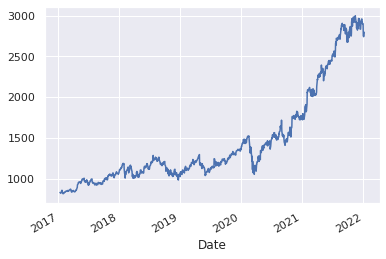

In [31]:
google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [32]:
google = google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2022-01-11,2760.14,2804.32,2733.84,2794.72,1436485
1,2022-01-10,2701.56,2776.39,2663.29,2773.39,2220406
2,2022-01-07,2762.91,2768.97,2715.33,2740.34,1488028
3,2022-01-06,2739.97,2798.80,2731.17,2754.95,1867371
4,2022-01-05,2888.40,2889.99,2753.76,2755.50,2730914
...,...,...,...,...,...,...
1253,2017-01-20,829.09,829.24,824.60,828.17,1226948
1254,2017-01-19,829.00,833.00,823.96,824.37,1055419
1255,2017-01-18,829.80,829.81,824.08,829.02,962010
1256,2017-01-17,830.00,830.18,823.20,827.46,1201317


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [33]:
google['Month'] = google['Date'].dt.month
google

,Date,Open,High,Low,Close,Volume,Month
0,2022-01-11,2760.14,2804.32,2733.84,2794.72,1436485,1
1,2022-01-10,2701.56,2776.39,2663.29,2773.39,2220406,1
2,2022-01-07,2762.91,2768.97,2715.33,2740.34,1488028,1
3,2022-01-06,2739.97,2798.80,2731.17,2754.95,1867371,1
4,2022-01-05,2888.40,2889.99,2753.76,2755.50,2730914,1
...,...,...,...,...,...,...,...
1253,2017-01-20,829.09,829.24,824.60,828.17,1226948,1
1254,2017-01-19,829.00,833.00,823.96,824.37,1055419,1
1255,2017-01-18,829.80,829.81,824.08,829.02,962010,1
1256,2017-01-17,830.00,830.18,823.20,827.46,1201317,1


In [34]:
google['Year'] = google['Date'].dt.year
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2022-01-11,2760.14,2804.32,2733.84,2794.72,1436485,1,2022
1,2022-01-10,2701.56,2776.39,2663.29,2773.39,2220406,1,2022
2,2022-01-07,2762.91,2768.97,2715.33,2740.34,1488028,1,2022
3,2022-01-06,2739.97,2798.80,2731.17,2754.95,1867371,1,2022
4,2022-01-05,2888.40,2889.99,2753.76,2755.50,2730914,1,2022
...,...,...,...,...,...,...,...,...
1253,2017-01-20,829.09,829.24,824.60,828.17,1226948,1,2017
1254,2017-01-19,829.00,833.00,823.96,824.37,1055419,1,2017
1255,2017-01-18,829.80,829.81,824.08,829.02,962010,1,2017
1256,2017-01-17,830.00,830.18,823.20,827.46,1201317,1,2017


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [35]:
google.groupby('Year')['Close'].mean()

Year
2017    943.68
2018   1122.05
2019   1191.22
2020   1478.99
2021   2484.50
2022   2800.96
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

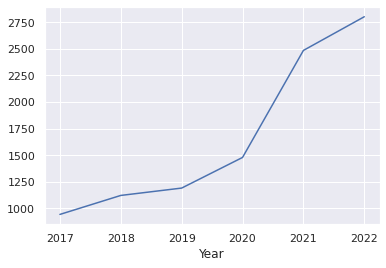

In [36]:
google.groupby('Year')['Close'].mean().plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [37]:
google.groupby('Month')['Close'].mean()

Month
1    1392.45
2    1314.21
3    1278.61
4    1336.22
5    1358.70
6    1420.24
7    1482.95
8    1526.55
9    1553.43
10   1521.49
11   1620.77
12   1652.97
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

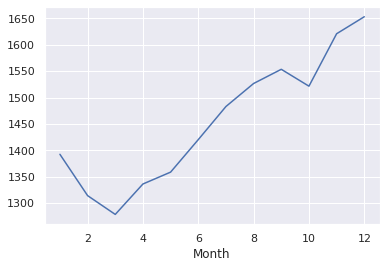

In [38]:
google.groupby('Month')['Close'].mean().plot()


### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [39]:
google.groupby(['Year','Month']).mean()


Open    High     Low   Close     Volume
Year Month                                           
2017 1      837.97  841.75  831.08  836.53 1911471.25
     2      836.15  839.68  832.23  836.76 1316022.37
     3      854.07  857.65  848.70  853.78 1453097.04
     4      860.08  865.52  856.67  861.38 1462295.68
     5      959.60  966.03  955.10  961.65 1606355.00
...            ...     ...     ...     ...        ...
2021 9     2831.83 2847.70 2804.63 2823.57 1406939.00
     10    2792.46 2823.21 2767.92 2802.26 1716190.48
     11    2944.85 2966.00 2913.11 2935.13 1448724.71
     12    2902.64 2928.36 2872.19 2903.02 1409996.50
2022 1     2808.86 2840.74 2763.71 2800.96 1799589.00

[61 rows x 5 columns]

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [40]:
google['Close'].argmax()

36

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [44]:
google.iloc[[google['Close'].argmax()]]

,Date,Open,High,Low,Close,Volume,Month,Year
36,2021-11-18,2964.83,3011.61,2957.69,2996.77,1781411,11,2021


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [45]:
google[['Date','Open','Close','Volume']]

,Date,Open,Close,Volume
0,2022-01-11,2760.14,2794.72,1436485
1,2022-01-10,2701.56,2773.39,2220406
2,2022-01-07,2762.91,2740.34,1488028
3,2022-01-06,2739.97,2754.95,1867371
4,2022-01-05,2888.40,2755.50,2730914
...,...,...,...,...
1253,2017-01-20,829.09,828.17,1226948
1254,2017-01-19,829.00,824.37,1055419
1255,2017-01-18,829.80,829.02,962010
1256,2017-01-17,830.00,827.46,1201317


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [52]:
google = google.set_index('Date')

### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [53]:
#del google['Year']
#del google['Month']
google

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-11,2760.14,2804.32,2733.84,2794.72,1436485
2022-01-10,2701.56,2776.39,2663.29,2773.39,2220406
2022-01-07,2762.91,2768.97,2715.33,2740.34,1488028
2022-01-06,2739.97,2798.80,2731.17,2754.95,1867371
2022-01-05,2888.40,2889.99,2753.76,2755.50,2730914
...,...,...,...,...,...
2017-01-20,829.09,829.24,824.60,828.17,1226948
2017-01-19,829.00,833.00,823.96,824.37,1055419
2017-01-18,829.80,829.81,824.08,829.02,962010


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [54]:
google.columns=['Otwarcie','Najwyzszy','Najnizszy','Zamkniecie','Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2022-01-11,2760.14,2804.32,2733.84,2794.72,1436485
2022-01-10,2701.56,2776.39,2663.29,2773.39,2220406
2022-01-07,2762.91,2768.97,2715.33,2740.34,1488028
2022-01-06,2739.97,2798.80,2731.17,2754.95,1867371
2022-01-05,2888.40,2889.99,2753.76,2755.50,2730914
...,...,...,...,...,...
2017-01-20,829.09,829.24,824.60,828.17,1226948
2017-01-19,829.00,833.00,823.96,824.37,1055419
2017-01-18,829.80,829.81,824.08,829.02,962010
